In [117]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import scipy.special as ss
import numpy as np
import math, pdb, sympy
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D

In [118]:
def Laguerre(p,q):
	x = sympy.Symbol('x')
	exp = (-1)**p*sympy.diff(sympy.simplify(sympy.E**x*sympy.diff(sympy.E**(-x)*x**q,x,q)),x,p)
	return lambda x: eval(str(exp))

In [119]:
def SphericalHarmonic(l,m,theta,phi,epsilon):
	# this function uses the associated legendre polynomial evaluator from scipy.special
	return epsilon*np.sqrt((2.*l+1)*math.factorial(l-np.abs(m))/(4*np.pi*math.factorial(l+np.abs(m))))*np.real(np.exp(1.j*m*phi)*ss.lpmv(m,l,np.cos(theta)))


In [120]:
def Radial(n,l,r,a):
	p = r/(n*a)
	lag = Laguerre(2*l+1,n+l)
	# this function uses the associated laguerre polynomial evaluator from scipy.special
	return np.sqrt((2./n/a)**3*math.factorial(n-l-1)/(2.*n*(math.factorial(n+1))**3))*np.exp(-p)*(2*p)**l*lag(2*p)


In [121]:
def graphHydrogen(n,l,m):

	#be careful that n>0, 0<l<n, |n|<= l

	#Bohr radius in pixels, only for scale
	#20 works fine but can be changed
	
	a = 20
	
	# parameters for the plot (tuned such that the bohr radius is on the same scale as 
	# pixels #)
	resolution = 300; frame_apothem = 300

	# constant for the spherical harmonics (epsilon)
	if m>=0:
		eps = (-1)**m
	else:
		eps = 1

	# create array of data points
	x = np.linspace(-frame_apothem*1.6,frame_apothem*1.6,int(resolution*1.6))
	y = np.linspace(-frame_apothem,frame_apothem,resolution)
	X, Y = np.meshgrid(x,x)
	# create an array of wavefunction values (1e-10 added so that arctan never sees X/0)
	Z = np.abs(Radial(n,l,np.sqrt((X**2+Y**2)),a)*SphericalHarmonic(l,m,np.arctan(X/(Y+1e-10)),0,eps))**2
	Z = Z.astype(np.float)
	Z = np.sqrt(Z)	# this is done to "raise" the lower, less perceptible values to sight
	# plot the wavefunction in grayscale
	plt.imshow(Z, cmap=cm.Greys_r); plt.show()
	print("Hydrogen wave function for %d,%d,%d" %(n,l,m))

In [122]:
def momentum3d (l,m):

	rt = np.sqrt(l*(l+1))
	z = m


	r = np.sqrt(rt**2 - z**2)

	fig = plt.figure()
	ax = fig.add_subplot(111, projection='3d')

	theta = np.linspace(0, 2 * np.pi, 201)
	x = r*np.cos(theta)
	y = r*np.sin(theta)

	ax.plot(x,y,z)


	ax.plot((0,0),(0,0), (-10,10), '-k', label='h bar')
	ax.legend()



	plt.show()
	print("Angular momentum 3d for n,%d,%d" %(l,m))

In [129]:
def momentum2d(l,m):
	rt = np.sqrt(l*(l+1))
	z = m
	r = np.sqrt(rt**2 - z**2)

	x = [-r,r]
	z2 = [m,m]


	fig = plt.figure()

	plt.plot(x,z2,'ro')

	plt.plot((0,0),(-5,5))
	plt.plot((-5,5),(0,0))

	plt.show()
	print("Angular momentum in x-z for n,%d,%d" %(l,m))

In [124]:
def momentum3dall (l):

	fig = plt.figure()
	ax = fig.add_subplot(111, projection='3d')
	ax.plot((0,0),(0,0), (-4,4), '-k', label='h bar')
    
	z = -l
	while z<=l :
		rt = np.sqrt(l*(l+1))



		r = np.sqrt(rt**2 - z**2)

		theta = np.linspace(0, 2 * np.pi, 201)
		x = r*np.cos(theta)
		y = r*np.sin(theta)

		ax.plot(x,y,z)



		ax.legend()

		z += 1



	plt.show()
	print("All angular momentum 3d for n,%d,x" %(l))

In [125]:
def momentum2dall(l):

	fig = plt.figure()
	
	z = -l
	rt = np.sqrt(l*(l+1))
	
	while z<=l :

		r = np.sqrt(rt**2 - z**2)

		x = [-r,r]
		z2 = [z,z]


		plt.plot(x,z2,'ro')

		plt.plot((0,0),(-5,5))
		plt.plot((-5,5),(0,0))
		z += 1

	plt.show()
	print("All angular momentum in x-z for n,%d,x" %(l))

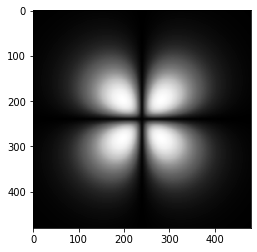

Hydrogen wave function for 3,2,1


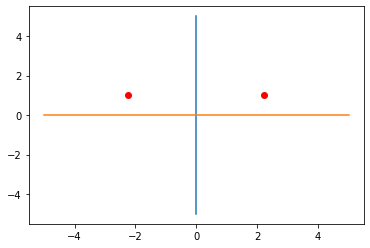

Angular momentum in x-z for n,2,1


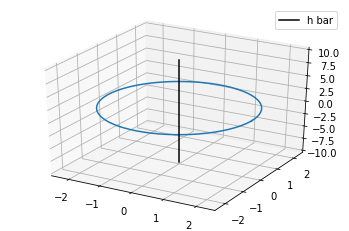

Angular momentum 3d for n,2,1


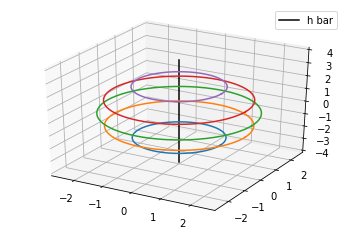

All angular momentum 3d for n,2,x


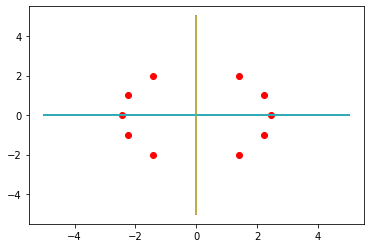

All angular momentum in x-z for n,2,x


In [130]:
#main window for testing
n = 3
l = 2
m = 1

graphHydrogen(n,l,m)
momentum2d(l,m)
momentum3d(l,m)
momentum3dall(l)
momentum2dall(l)